# Phase 2: Find Processing Techniques
## Iteration 2: Add Layers and Fine-Tune Basic Model 
### Import Libraries and Scripts

In [6]:
%reload_ext autoreload
%autoreload 2

In [1]:
# import functions and classes for model
from Utils.preporcessing_utils import data_loading 
from Utils.preporcessing_utils import labels_encoding
from Utils.preporcessing_utils import split_data
from Utils.preporcessing_utils import ablation
from Utils.run_model_utils import run_model

2025-09-15 11:29:14.326963: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-15 11:29:14.532553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757950154.551484   46836 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757950154.557244   46836 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-15 11:29:14.586963: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# import functions and classes for visualization
from Utils.visualizations_utils import Visualization

### Data Preparation and Basic Preprocessing

In [3]:
# Loads data
train_df, test_df = data_loading("train_full.csv", "test_full.csv")

In [4]:
# Create dataframe and transform(encodes) pathology labels
train_df, test_df = labels_encoding(train_df, test_df)

In [5]:
train_df.columns

Index(['image_id', 'image_type', 'image_path', 'series_uid', 'subject_id',
       'study_uid', 'breast_density', 'breast_side', 'image_view',
       'abnormality_type', 'pathology', 'split', 'label'],
      dtype='object')

In [6]:
# Split data
train_data, val_data, test_data = split_data(train_df, test_df, 0.11)

Train set: 1889 cases, 70.35 %
Validation set: 234 cases, 8.72 %
Test set: 562 cases, 20.93 %


In [7]:
# train_10 = train_data[:10]
# val_data_10 = val_data[:10]
# test_data_10 = test_data[:10]

### Create Preprocessing Groups by Using Ablation

In [8]:
# create groups using ablation
options = ['apply_background_removal',
           'apply_crop',
           'apply_noise_reduction',
           'apply_contrast_enhancement',
           'apply_edge_enhancement',
           'apply_lbp_texturizer']

In [9]:
# create group of techniques to try
techniques_groups = ablation(options)

In [10]:
baseline_techniques = {"Baseline Basic Preporcessing": techniques_groups["Baseline Basic Preporcessing"]}

### Fine-Tune Custom CNN Settings 

In [11]:
architecture_settings_iter2 = {
    "Baseline_2(No Dropout)": {"epochs":10, "layers": [32, 64, 128], "activation": 'relu', "dense_units":None, "dropout": None},
    "Baseline_2(DenseU=256, Dropout=0.2)": {"epochs":10, "layers": [32, 64, 128], "activation": 'relu', "dense_units":[256], "dropout": 0.2},
    "Baseline_2(DenseU=256, Dropout=0.2, layer=256)": {"epochs":10, "layers": [32, 64, 128, 256], "activation": 'relu', "dense_units":[256], "dropout": 0.2},
    "Baseline_2(DenseU=256, Dropout=0.3)": {"epochs":10, "layers": [32, 64, 128], "activation": 'relu', "dense_units":[256], "dropout": 0.3},
    "Baseline_2(DenseU=256, Dropout=0.3, layer=256)": {"epochs":10, "layers": [32, 64, 128, 256], "activation": 'relu', "dense_units":[256], "dropout": 0.3},
    "Baseline_2(DenseU=256, Dropout=0.4)": {"epochs":10, "layers": [32, 64, 128], "activation": 'relu', "dense_units":[256], "dropout": 0.4},
    "Baseline_2(DenseU=256, Dropout=0.4, layer=256)": {"epochs":10, "layers": [32, 64, 128, 256], "activation": 'relu', "dense_units":[256], "dropout": 0.4},
}

In [12]:
import pandas as pd
arch = pd.DataFrame(architecture_settings_iter2)
arch.transpose()

,epochs,layers,activation,dense_units,dropout
Baseline_2(No Dropout),10,"[32, 64, 128]",relu,None,None
"Baseline_2(DenseU=256, Dropout=0.2)",10,"[32, 64, 128]",relu,[256],0.2
"Baseline_2(DenseU=256, Dropout=0.2, layer=256)",10,"[32, 64, 128, 256]",relu,[256],0.2
"Baseline_2(DenseU=256, Dropout=0.3)",10,"[32, 64, 128]",relu,[256],0.3
"Baseline_2(DenseU=256, Dropout=0.3, layer=256)",10,"[32, 64, 128, 256]",relu,[256],0.3
"Baseline_2(DenseU=256, Dropout=0.4)",10,"[32, 64, 128]",relu,[256],0.4
"Baseline_2(DenseU=256, Dropout=0.4, layer=256)",10,"[32, 64, 128, 256]",relu,[256],0.4


### Trining Dynamic Baseline Model with Different Settings
#### Training
This models uses the custom CNN with 10 epochs and the tf.Dataset image iterator and different settings combinations. <br>Changes in:
- Dropout from 0.2 to 0.4
- No dense units to dense units of 256
- Adding a new layer of 256 

In [13]:
# runs baseline model with an image dataset generator 
run_model((train_data, val_data, test_data), 
              baseline_techniques, 
              project_phase="P2",
              iteration=2,
              with_preprocess=False, 
              model_type="dynamic",
              models_settings=architecture_settings_iter2)

I0000 00:00:1757950246.194093   46836 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Training Dynamic10 - Baseline Basic Preporcessing - Baseline_2(No Dropout)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       131,073 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,641 (877.50 KB)

 Trainable params: 224,193 (875.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10


I0000 00:00:1757950248.197191   63054 service.cc:148] XLA service 0x16961200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757950248.197275   63054 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-09-15 11:30:48.225667: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1757950248.379362   63054 cuda_dnn.cc:529] Loaded cuDNN version 90501


 2/60 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4844 - loss: 0.9653

I0000 00:00:1757950252.671373   63054 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.5321 - loss: 1.0270 - val_accuracy: 0.5556 - val_loss: 0.7203
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5945 - loss: 0.7810 - val_accuracy: 0.5299 - val_loss: 0.7487
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7115 - loss: 0.5702 - val_accuracy: 0.5897 - val_loss: 0.7369
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7631 - loss: 0.5018 - val_accuracy: 0.5769 - val_loss: 0.7471
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8046 - loss: 0.4484 - val_accuracy: 0.5641 - val_loss: 0.7743
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8386 - loss: 0.4019 - val_accuracy: 0.5513 - val_loss: 0.8124
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8597 - loss: 0.3656 - val_accuracy: 0.5470 - val_loss: 0.8748
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8588 - loss: 0.3470 - val_accuracy: 0.5513 - val_loss: 1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,648,513 (128.36 MB)

 Trainable params: 33,648,065 (128.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.5523 - loss: 2.4973 - val_accuracy: 0.5427 - val_loss: 0.6948
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5613 - loss: 0.6879 - val_accuracy: 0.5299 - val_loss: 0.6884
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5988 - loss: 0.6415 - val_accuracy: 0.5598 - val_loss: 0.6732
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6641 - loss: 0.6226 - val_accuracy: 0.5897 - val_loss: 0.6615
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6790 - loss: 0.5827 - val_accuracy: 0.6239 - val_loss: 0.6574
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7021 - loss: 0.5531 - val_accuracy: 0.5983 - val_loss: 0.6673
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7317 - loss: 0.5307 - val_accuracy: 0.5855 - val_loss: 0.6838
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7604 - loss: 0.4786 - val_accuracy: 0.5769 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,489 (65.49 MB)

 Trainable params: 17,166,529 (65.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.4773 - loss: 1.5483 - val_accuracy: 0.5769 - val_loss: 0.6830
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5664 - loss: 0.6847 - val_accuracy: 0.5684 - val_loss: 0.6787
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.5977 - loss: 0.6527 - val_accuracy: 0.5897 - val_loss: 0.6640
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6235 - loss: 0.6409 - val_accuracy: 0.5855 - val_loss: 0.6680
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6440 - loss: 0.6174 - val_accuracy: 0.5897 - val_loss: 0.6589
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6787 - loss: 0.5856 - val_accuracy: 0.5812 - val_loss: 0.6591
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6899 - loss: 0.5546 - val_accuracy: 0.5940 - val_loss: 0.6351
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7283 - loss: 0.5274 - val_accuracy: 0.6239 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,648,513 (128.36 MB)

 Trainable params: 33,648,065 (128.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.5538 - loss: 2.7844 - val_accuracy: 0.5684 - val_loss: 0.6900
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5892 - loss: 0.6767 - val_accuracy: 0.5769 - val_loss: 0.6719
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6107 - loss: 0.6506 - val_accuracy: 0.5641 - val_loss: 0.6687
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6362 - loss: 0.6264 - val_accuracy: 0.5897 - val_loss: 0.6514
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6809 - loss: 0.5876 - val_accuracy: 0.6026 - val_loss: 0.6938
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6703 - loss: 0.5625 - val_accuracy: 0.5769 - val_loss: 0.6520
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7038 - loss: 0.5521 - val_accuracy: 0.6325 - val_loss: 0.6370
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7212 - loss: 0.5235 - val_accuracy: 0.5812 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,489 (65.49 MB)

 Trainable params: 17,166,529 (65.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.5152 - loss: 1.7197 - val_accuracy: 0.5427 - val_loss: 0.6892
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5746 - loss: 0.6906 - val_accuracy: 0.5427 - val_loss: 0.6795
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5740 - loss: 0.6593 - val_accuracy: 0.5513 - val_loss: 0.6829
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6348 - loss: 0.6354 - val_accuracy: 0.6154 - val_loss: 0.6599
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6606 - loss: 0.6162 - val_accuracy: 0.5855 - val_loss: 0.6636
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6629 - loss: 0.6050 - val_accuracy: 0.6068 - val_loss: 0.6431
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6891 - loss: 0.5753 - val_accuracy: 0.6368 - val_loss: 0.6375
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7389 - loss: 0.5375 - val_accuracy: 0.6068 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,648,513 (128.36 MB)

 Trainable params: 33,648,065 (128.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.5138 - loss: 2.6770 - val_accuracy: 0.5299 - val_loss: 0.7024
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5747 - loss: 0.6662 - val_accuracy: 0.5897 - val_loss: 0.6809
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6173 - loss: 0.6443 - val_accuracy: 0.5812 - val_loss: 0.6631
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5976 - loss: 0.6513 - val_accuracy: 0.5897 - val_loss: 0.6587
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6327 - loss: 0.6207 - val_accuracy: 0.5897 - val_loss: 0.6559
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6572 - loss: 0.6022 - val_accuracy: 0.5940 - val_loss: 0.6556
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6623 - loss: 0.5788 - val_accuracy: 0.5855 - val_loss: 0.6488
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6823 - loss: 0.5712 - val_accuracy: 0.6026 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,489 (65.49 MB)

 Trainable params: 17,166,529 (65.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.5352 - loss: 1.3818 - val_accuracy: 0.5427 - val_loss: 0.6857
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5431 - loss: 0.7098 - val_accuracy: 0.5812 - val_loss: 0.6785
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5887 - loss: 0.6680 - val_accuracy: 0.6068 - val_loss: 0.6673
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5754 - loss: 0.6708 - val_accuracy: 0.5769 - val_loss: 0.6705
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6370 - loss: 0.6389 - val_accuracy: 0.5983 - val_loss: 0.6584
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6554 - loss: 0.6169 - val_accuracy: 0.5726 - val_loss: 0.6685
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6570 - loss: 0.6060 - val_accuracy: 0.5812 - val_loss: 0.6499
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.6726 - loss: 0.5835 - val_accuracy: 0.6026 - v

#### Visulaizing
The following are some visualizations to compare the model outputs for each techniques

In [38]:
# gets data based from models using tf.Data.Dataset
out_dir = "Outputs/Iteration2"

# initialize visualization instance
vis = Visualization(out_directory=out_dir, str_filter="dynamic10", identifier=2)

# loads data 
models_data = vis.load_files()

# gets names of models
display_models_names = models_data.keys()

# classes
classes = ['Benigant', 'Malignant']

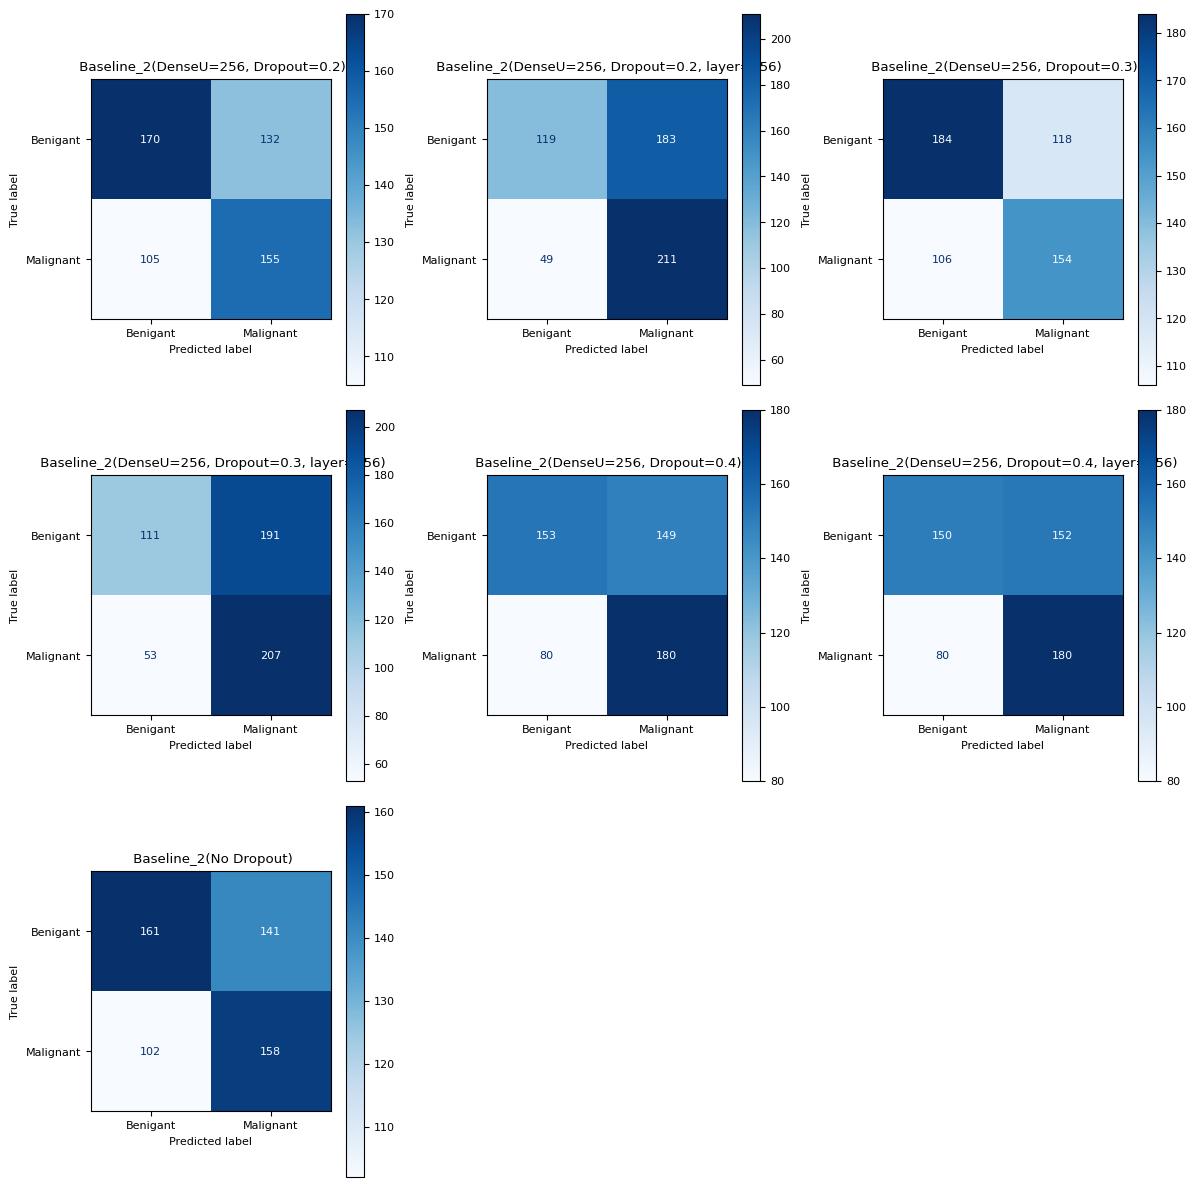

In [39]:
# vusualize confusion matrix
vis.confusion_matrices(models_data, models_data.keys(), classes=classes)

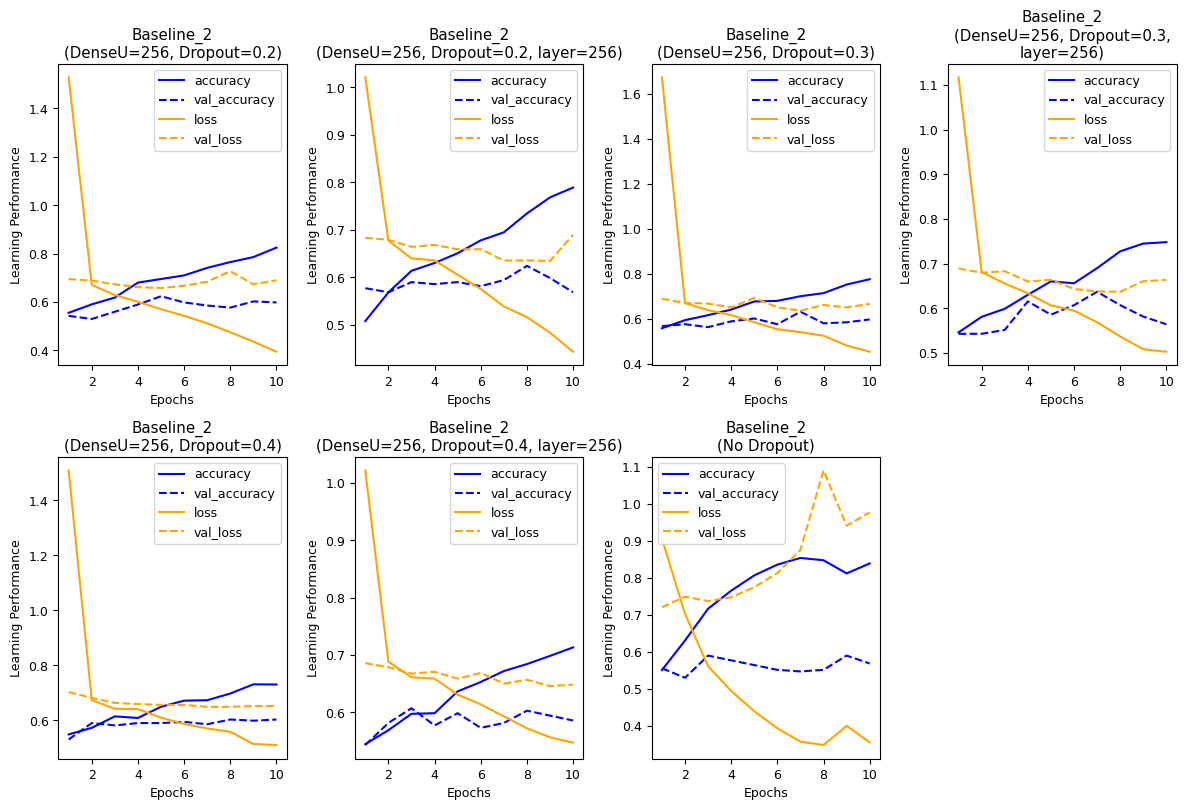

In [40]:
# vusualize line plots 
vis.learning_curves(models_data, display_models_names, ["accuracy", "loss"], ["blue", "orange"], wrap_char=10)

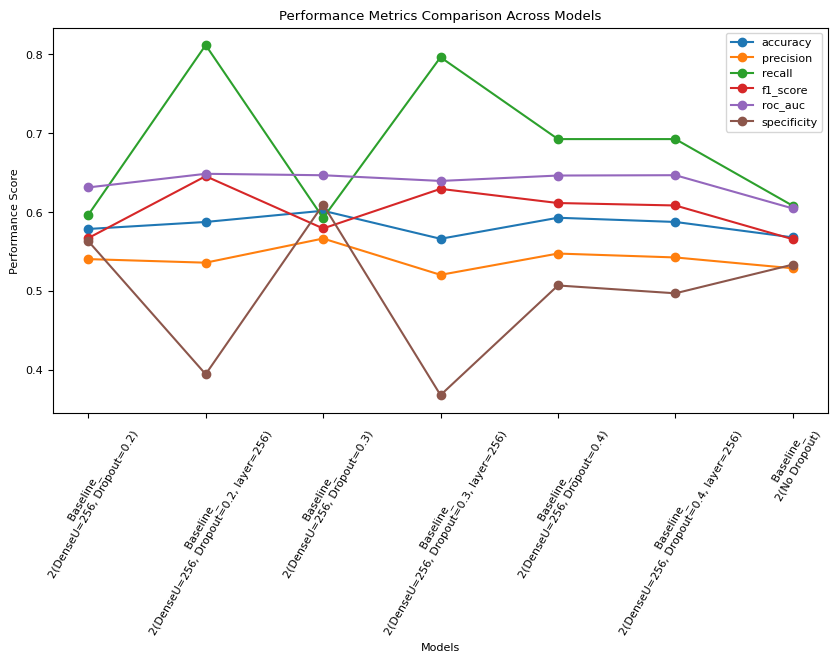

In [41]:
vis.line_plot(models_data, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"], wrap_char=10)

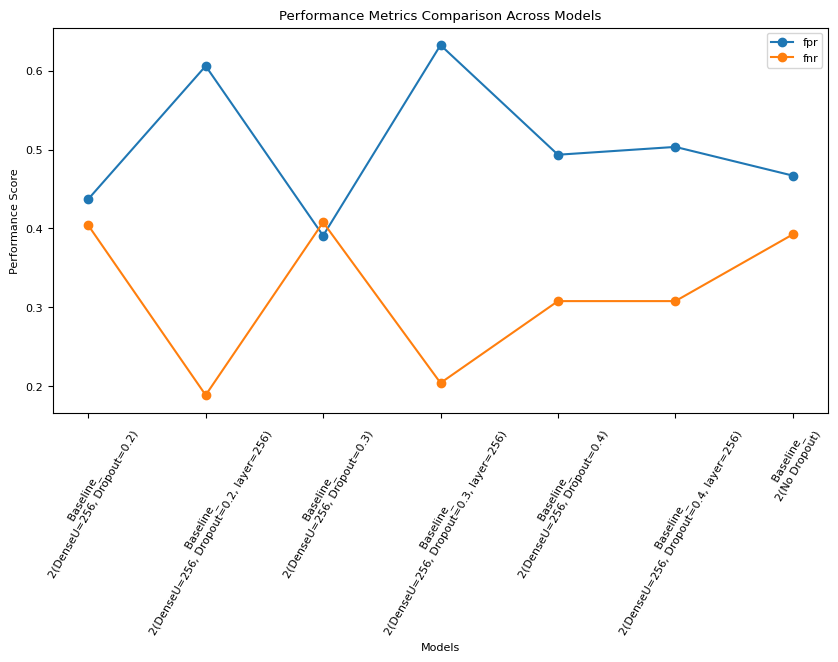

In [42]:
vis.line_plot(models_data, display_models_names, ["fpr", "fnr"], wrap_char=10)

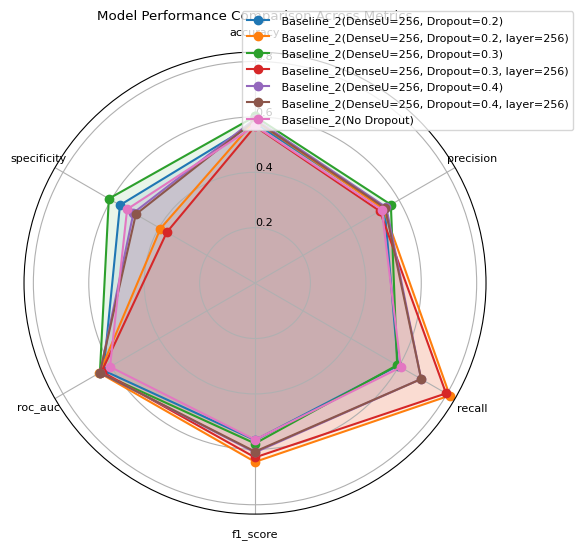

In [43]:
vis.radar_chart(models_data, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

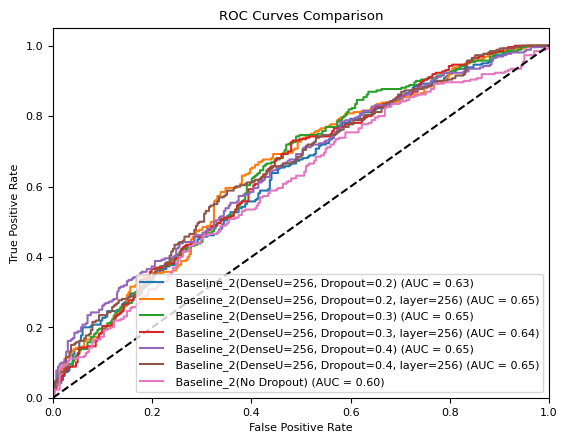

In [44]:
vis.ROC_curve(models_data, display_models_names)

### Fine-Tune Custom CNN Settings with 20 Epochs 

In [21]:
architecture_settings_iter20 = {
    "Baseline_2(No Dropout)": {"epochs":20, "layers": [32, 64, 128], "activation": 'relu', "dense_units":None, "dropout": None},
    "Baseline_2(DenseU=256, Dropout=0.2)": {"epochs":20, "layers": [32, 64, 128], "activation": 'relu', "dense_units":[256], "dropout": 0.2},
    "Baseline_2(DenseU=256, Dropout=0.2, layer=256)": {"epochs":20, "layers": [32, 64, 128, 256], "activation": 'relu', "dense_units":[256], "dropout": 0.2},
    "Baseline_2(DenseU=256, Dropout=0.3)": {"epochs":20, "layers": [32, 64, 128], "activation": 'relu', "dense_units":[256], "dropout": 0.3},
    "Baseline_2(DenseU=256, Dropout=0.3, layer=256)": {"epochs":20, "layers": [32, 64, 128, 256], "activation": 'relu', "dense_units":[256], "dropout": 0.3},
    "Baseline_2(DenseU=256, Dropout=0.4)": {"epochs":20, "layers": [32, 64, 128], "activation": 'relu', "dense_units":[256], "dropout": 0.4},
    "Baseline_2(DenseU=256, Dropout=0.4, layer=256)": {"epochs":20, "layers": [32, 64, 128, 256], "activation": 'relu', "dense_units":[256], "dropout": 0.4},
}

In [22]:
import pandas as pd
arch20 = pd.DataFrame(architecture_settings_iter20)
arch20.transpose()

,epochs,layers,activation,dense_units,dropout
Baseline_2(No Dropout),20,"[32, 64, 128]",relu,None,None
"Baseline_2(DenseU=256, Dropout=0.2)",20,"[32, 64, 128]",relu,[256],0.2
"Baseline_2(DenseU=256, Dropout=0.2, layer=256)",20,"[32, 64, 128, 256]",relu,[256],0.2
"Baseline_2(DenseU=256, Dropout=0.3)",20,"[32, 64, 128]",relu,[256],0.3
"Baseline_2(DenseU=256, Dropout=0.3, layer=256)",20,"[32, 64, 128, 256]",relu,[256],0.3
"Baseline_2(DenseU=256, Dropout=0.4)",20,"[32, 64, 128]",relu,[256],0.4
"Baseline_2(DenseU=256, Dropout=0.4, layer=256)",20,"[32, 64, 128, 256]",relu,[256],0.4


### Trining Dynamic Baseline Model with Different Settings
#### Training
This models uses the custom CNN with 20 epochs and the tf.Dataset image iterator with model settings changes. 

In [23]:
# runs baseline model with an image dataset generator 
run_model((train_data, val_data, test_data), 
              baseline_techniques, 
              project_phase="P2",
              iteration=2,
              with_preprocess=False, 
              model_type="dynamic",
              models_settings=architecture_settings_iter20)

Training Dynamic20 - Baseline Basic Preporcessing - Baseline_2(No Dropout)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       131,073 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,641 (877.50 KB)

 Trainable params: 224,193 (875.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5326 - loss: 1.0534 - val_accuracy: 0.5513 - val_loss: 0.7038
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5935 - loss: 0.8513 - val_accuracy: 0.5598 - val_loss: 0.7050
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7200 - loss: 0.5463 - val_accuracy: 0.5983 - val_loss: 0.7029
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7896 - loss: 0.4706 - val_accuracy: 0.6026 - val_loss: 0.7104
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8339 - loss: 0.4092 - val_accuracy: 0.5983 - val_loss: 0.7284
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8712 - loss: 0.3570 - val_accuracy: 0.6154 - val_loss: 0.7460
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8989 - loss: 0.3141 - val_accuracy: 0.6154 - val_loss: 0.7874
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9128 - loss: 0.2840 - val_accuracy: 0.5769 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,648,513 (128.36 MB)

 Trainable params: 33,648,065 (128.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.5045 - loss: 2.3100 - val_accuracy: 0.5513 - val_loss: 0.6850
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5728 - loss: 0.6734 - val_accuracy: 0.5598 - val_loss: 0.6770
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6097 - loss: 0.6482 - val_accuracy: 0.5812 - val_loss: 0.6629
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6034 - loss: 0.6443 - val_accuracy: 0.5598 - val_loss: 0.6766
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6457 - loss: 0.6217 - val_accuracy: 0.5983 - val_loss: 0.6579
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7103 - loss: 0.5653 - val_accuracy: 0.5897 - val_loss: 0.6788
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7221 - loss: 0.5293 - val_accuracy: 0.5684 - val_loss: 0.6814
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7522 - loss: 0.4817 - val_accuracy: 0.5641 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,489 (65.49 MB)

 Trainable params: 17,166,529 (65.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.5658 - loss: 1.6319 - val_accuracy: 0.5556 - val_loss: 0.6917
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5689 - loss: 0.6808 - val_accuracy: 0.5214 - val_loss: 0.6890
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5860 - loss: 0.6650 - val_accuracy: 0.5385 - val_loss: 0.6882
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6291 - loss: 0.6404 - val_accuracy: 0.5556 - val_loss: 0.6777
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6400 - loss: 0.6146 - val_accuracy: 0.5598 - val_loss: 0.6994
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6809 - loss: 0.5924 - val_accuracy: 0.5940 - val_loss: 0.6647
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6944 - loss: 0.5714 - val_accuracy: 0.5812 - val_loss: 0.6709
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7255 - loss: 0.5307 - val_accuracy: 0.6111 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,648,513 (128.36 MB)

 Trainable params: 33,648,065 (128.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5177 - loss: 2.7665 - val_accuracy: 0.5855 - val_loss: 0.6845
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5774 - loss: 0.6699 - val_accuracy: 0.5513 - val_loss: 0.6793
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6224 - loss: 0.6398 - val_accuracy: 0.5556 - val_loss: 0.6870
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6213 - loss: 0.6425 - val_accuracy: 0.6026 - val_loss: 0.6731
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6576 - loss: 0.6054 - val_accuracy: 0.5598 - val_loss: 0.6587
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6774 - loss: 0.5694 - val_accuracy: 0.5855 - val_loss: 0.6764
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6842 - loss: 0.5573 - val_accuracy: 0.5769 - val_loss: 0.6889
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7043 - loss: 0.5506 - val_accuracy: 0.6154 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,489 (65.49 MB)

 Trainable params: 17,166,529 (65.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.5251 - loss: 1.3785 - val_accuracy: 0.5897 - val_loss: 0.6848
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5213 - loss: 0.6807 - val_accuracy: 0.5556 - val_loss: 0.6911
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5807 - loss: 0.6692 - val_accuracy: 0.5556 - val_loss: 0.6826
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5969 - loss: 0.6535 - val_accuracy: 0.5897 - val_loss: 0.6681
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6211 - loss: 0.6252 - val_accuracy: 0.5855 - val_loss: 0.6559
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6209 - loss: 0.6152 - val_accuracy: 0.5556 - val_loss: 0.6918
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6314 - loss: 0.5962 - val_accuracy: 0.5897 - val_loss: 0.6561
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6542 - loss: 0.5871 - val_accuracy: 0.6239 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,648,513 (128.36 MB)

 Trainable params: 33,648,065 (128.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.5241 - loss: 2.3788 - val_accuracy: 0.5513 - val_loss: 0.6879
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5730 - loss: 0.6690 - val_accuracy: 0.5726 - val_loss: 0.6882
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6192 - loss: 0.6404 - val_accuracy: 0.6026 - val_loss: 0.6697
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6273 - loss: 0.6297 - val_accuracy: 0.6026 - val_loss: 0.6538
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6593 - loss: 0.5996 - val_accuracy: 0.6026 - val_loss: 0.6462
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6630 - loss: 0.5891 - val_accuracy: 0.6111 - val_loss: 0.6473
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6920 - loss: 0.5586 - val_accuracy: 0.6368 - val_loss: 0.6264
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7277 - loss: 0.5151 - val_accuracy: 0.5897 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,489 (65.49 MB)

 Trainable params: 17,166,529 (65.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.5258 - loss: 1.7624 - val_accuracy: 0.5556 - val_loss: 0.6863
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5484 - loss: 0.6793 - val_accuracy: 0.5513 - val_loss: 0.6753
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5880 - loss: 0.6602 - val_accuracy: 0.5769 - val_loss: 0.6776
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6024 - loss: 0.6444 - val_accuracy: 0.5855 - val_loss: 0.6647
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6341 - loss: 0.6368 - val_accuracy: 0.5726 - val_loss: 0.6615
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6194 - loss: 0.6273 - val_accuracy: 0.6068 - val_loss: 0.6559
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6492 - loss: 0.5937 - val_accuracy: 0.5769 - val_loss: 0.6610
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6668 - loss: 0.5814 - val_accuracy: 0.6111 - v

#### Visulaizing
The following are some visualizations to compare the model outputs for each techniques

In [24]:
# gets data based from models using tf.Data.Dataset
out_dir_20 = "Outputs/Iteration2"

# initialize visualization instance
vis_20 = Visualization(out_directory=out_dir_20, str_filter="dynamic20", identifier=2)

# loads data 
models_data_20 = vis_20.load_files()

# gets names of models
display_models_names_20 = models_data_20.keys()

# classes
classes_20 = ['Benigant', 'Malignant']

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


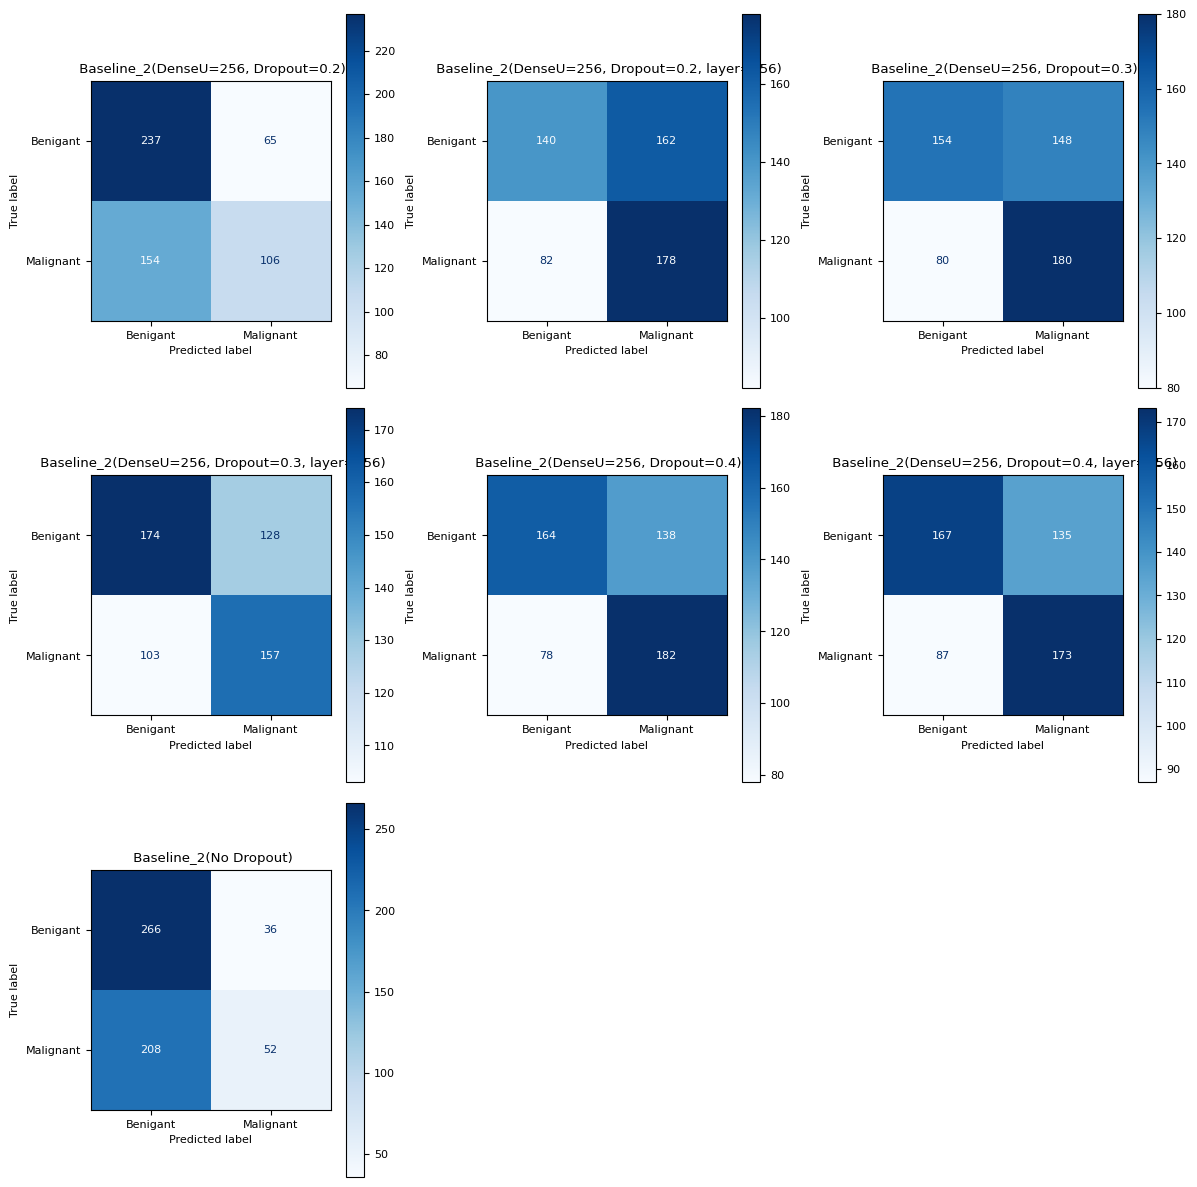

In [25]:
# vusualize confusion matrix
vis_20.confusion_matrices(models_data_20, models_data_20.keys(), classes=classes_20)

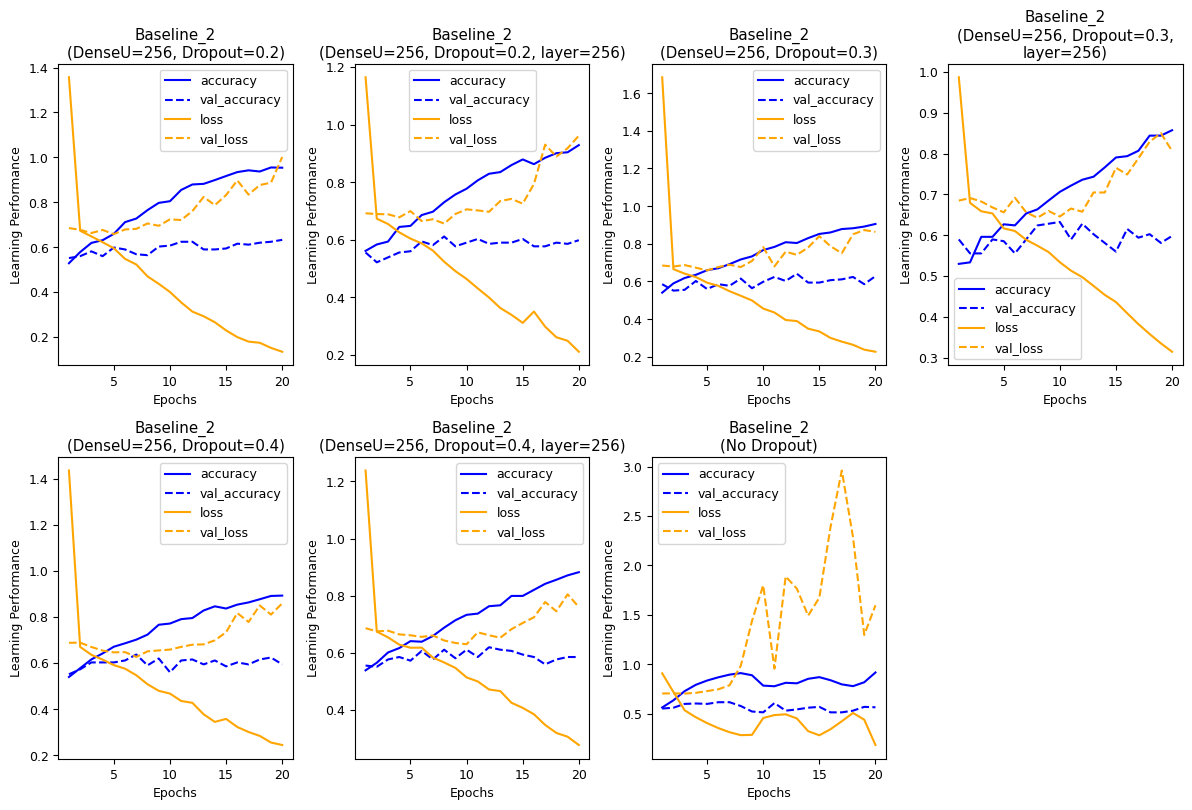

In [26]:
# vusualize line plots 
vis_20.learning_curves(models_data_20, display_models_names_20, ["accuracy", "loss"], ["blue", "orange"], wrap_char=10)

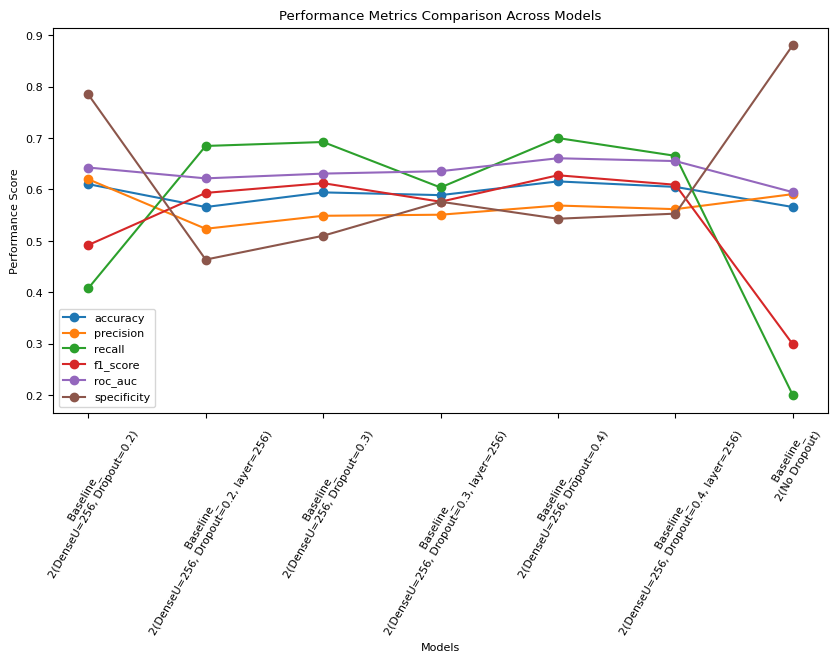

In [27]:
vis_20.line_plot(models_data_20, display_models_names_20, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"], wrap_char=10)

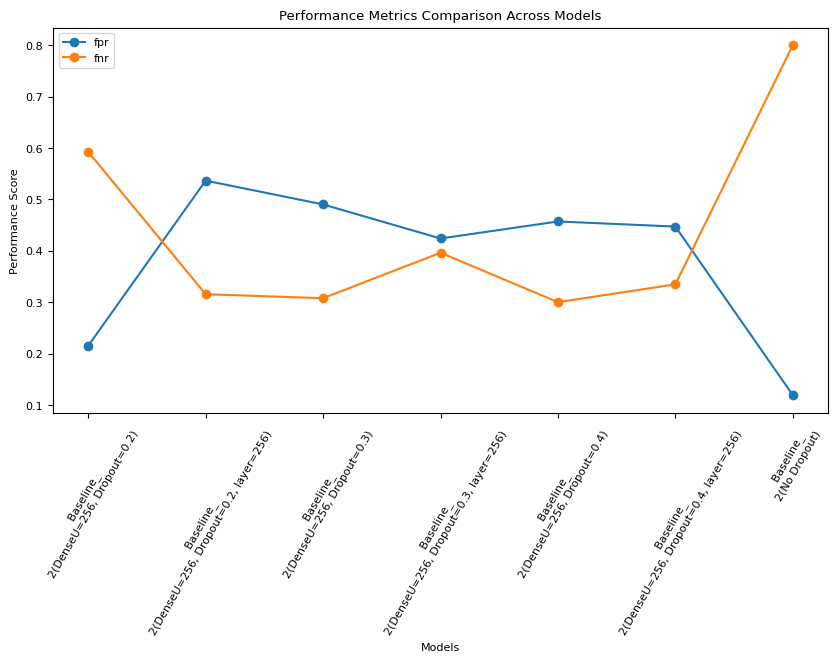

In [28]:
vis_20.line_plot(models_data_20, display_models_names_20, ["fpr", "fnr"], wrap_char=10)

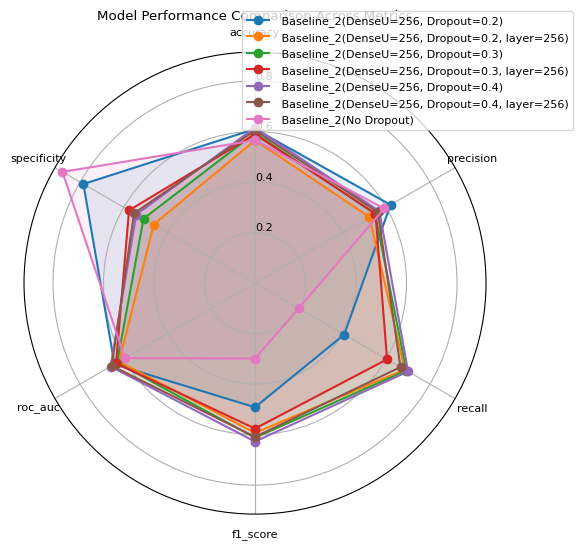

In [29]:
vis_20.radar_chart(models_data_20, display_models_names_20, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

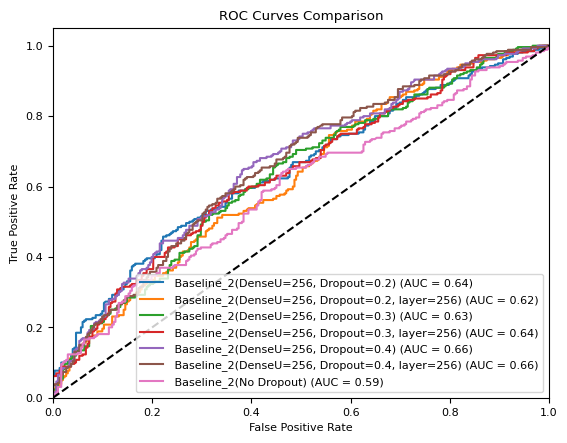

In [30]:
vis_20.ROC_curve(models_data_20, display_models_names_20)